<a href="https://colab.research.google.com/github/Hoopoe11/Lab/blob/main/zad_dom_lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **A regression example**

Common type of machine learning problem is "regression", which consists of predicting a continuous value instead of a discrete label. For instance, predicting the temperature tomorrow, given meteorological data, or predicting the time that a software project will take to complete, given its specifications.



In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt


**1-dimensional data**

In [ ]:
def funct(x):
  return x*x*np.sin(x)+np.log(2*x)

size =200
low=0
high=12
error=20

XX_train = np.random.uniform(low=low, high=high, size=size)
XX_test = np.random.uniform(low=low, high=high, size=size)
yy_train = funct(XX_train) + np.random.normal(0., error, size)
yy_test = funct(XX_test) + np.random.normal(0., error, size)

print(XX_train.shape, yy_train.shape)

(200,) (200,)


Plot the function and data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

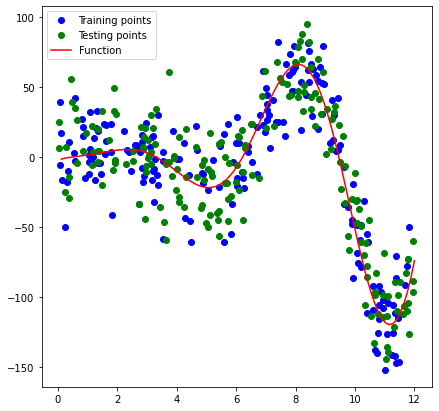

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train,yy_train, 'o', color='blue', label='Training points')
plt.plot(XX_test,yy_test, 'o', color='green', label='Testing points')

points = np.linspace(low, high,num=100)
plt.plot(points, funct(points),  color='red', label='Function')
plt.legend()


plt.show


**Preparing the data**

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:


In [ ]:
# Tutaj należy znormalizować dane, i.e. 
# - odjąć średnią
# - podzielić przez odchylenie standardowe

# 
meanX = XX_train.mean(axis=0)
XX_train_n = XX_train-meanX
stdX = XX_train_n.std(axis=0)
XX_train_n /= stdX

# to samo dla x_test
XX_test_n = XX_test - meanX
XX_test_n /= stdX

meanY = yy_train.mean(axis=0)
yy_train_n = yy_train-meanY
stdY = yy_train_n.std(axis=0)
yy_train_n /= stdY

# to samo dla y_test
yy_test_n = yy_test - meanY
yy_test_n /= stdY

# A teraz to samo dla yy_train i yy_test
# dopisać to samo dla y


Define neural network

In [ ]:
# Zbudować sieć neuronową, działa: dwie warstwy ukryte, aktywacja relu
from keras import models
from keras import layers

model0 = Sequential(name='network')
#.....
model0.add(layers.Dense(1024, activation='relu', input_shape=(1,)))
model0.add(Dropout(0.2))
model0.add(layers.Dense(1024, activation='relu'))
model0.add(Dropout(0.2))
model0.add(layers.Dense(1, activation='linear'))

model0.summary()

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1024)              2048      
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 1025      
Total params: 1,052,673
Trainable params: 1,052,673
Non-trainable params: 0
_________________________________________________________________


Train neural network

For regression problems, mean squared error (MSE) is often employed




In [ ]:
# compile and train NN
# Uwaga: dla regresji używamy: loss = 'mean_squared_error'   oraz metrics = ['mse']
opt=optimizers.RMSprop(lr=0.001)
model0.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
history = model0.fit(XX_train_n, yy_train_n,
                                     epochs=700,
                                     batch_size=128,
                                     validation_data=(XX_test_n, yy_test_n))

Epoch 1/700
2/2 [==============================] - 0s 65ms/step - loss: 1.0926 - mse: 1.0926 - val_loss: 0.7971 - val_mse: 0.7971
Epoch 2/700
2/2 [==============================] - 0s 10ms/step - loss: 0.8101 - mse: 0.8101 - val_loss: 0.6970 - val_mse: 0.6970
Epoch 3/700
2/2 [==============================] - 0s 9ms/step - loss: 0.7687 - mse: 0.7687 - val_loss: 0.6688 - val_mse: 0.6688
Epoch 4/700
2/2 [==============================] - 0s 10ms/step - loss: 0.6988 - mse: 0.6988 - val_loss: 0.6238 - val_mse: 0.6238
Epoch 5/700
2/2 [==============================] - 0s 9ms/step - loss: 0.6885 - mse: 0.6885 - val_loss: 0.5830 - val_mse: 0.5830
Epoch 6/700
2/2 [==============================] - 0s 10ms/step - loss: 0.6354 - mse: 0.6354 - val_loss: 0.5252 - val_mse: 0.5252
Epoch 7/700
2/2 [==============================] - 0s 10ms/step - loss: 0.5698 - mse: 0.5698 - val_loss: 0.4885 - val_mse: 0.4885
Epoch 8/700
2/2 [==============================] - 0s 10ms/step - loss: 0.5052 - mse: 0.5052

Plot loss

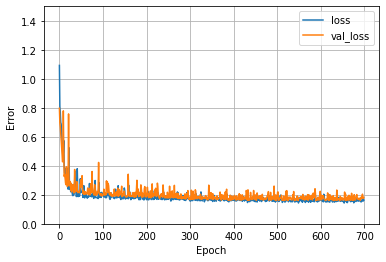

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

plot_loss(history)



Evaluate neural network

In [ ]:
results = model0.evaluate(XX_test_n, yy_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model0.evaluate(XX_train_n, yy_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.1817 - mse: 0.1817
loss test data:  0.1817205399274826
mse test data:  0.1817205399274826
7/7 [==============================] - 0s 2ms/step - loss: 0.1580 - mse: 0.1580
loss train data:  0.15796029567718506
mse train data:  0.15796029567718506


Plot results

<function matplotlib.pyplot.show>

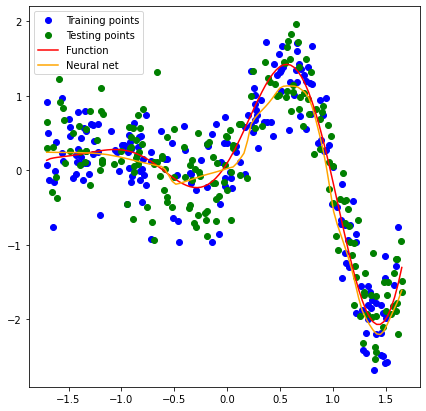

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n,yy_train_n, 'o', color='blue', label='Training points')
plt.plot(XX_test_n,yy_test_n, 'o', color='green', label='Testing points')

points = np.linspace(min(XX_test_n), max(XX_test_n),num=100)
plt.plot(points, (funct(points*stdX+meanX)-meanY)/stdY,  color='red', label='Function')

plt.plot(points, model0.predict(points),  color='orange', label='Neural net')


plt.legend()


plt.show

Rozwiązanie z regularyzatorem


In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def funct(x):
  return x*x*np.sin(x)+np.log(2*x)

size = 600
low=0
high=12
error=2

XX_train = np.random.uniform(low=low, high=high, size=size)
XX_test = np.random.uniform(low=low, high=high, size=size)
yy_train = funct(XX_train) + np.random.normal(0., error, size)
yy_test = funct(XX_test) + np.random.normal(0., error, size)

print(XX_train.shape, yy_train.shape)

(600,) (600,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

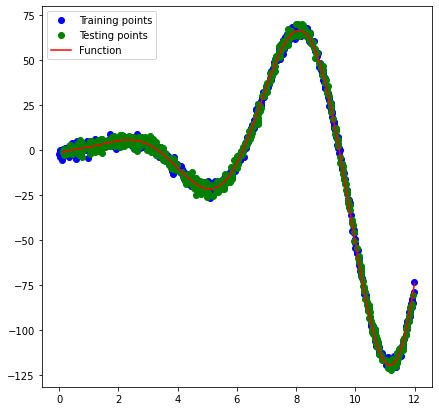

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train,yy_train, 'o', color='blue', label='Training points')
plt.plot(XX_test,yy_test, 'o', color='green', label='Testing points')

points = np.linspace(low, high,num=100)
plt.plot(points, funct(points),  color='red', label='Function')
plt.legend()


plt.show

In [ ]:
# Tutaj należy znormalizować dane, i.e. 
# - odjąć średnią
# - podzielić przez odchylenie standardowe

# 
meanX = XX_train.mean(axis=0)
XX_train_n = XX_train-meanX
stdX = XX_train_n.std(axis=0)
XX_train_n /= stdX

# to samo dla x_test
XX_test_n = XX_test - meanX
XX_test_n /= stdX

meanY = yy_train.mean(axis=0)
yy_train_n = yy_train-meanY
stdY = yy_train_n.std(axis=0)
yy_train_n /= stdY

# to samo dla y_test
yy_test_n = yy_test - meanY
yy_test_n /= stdY

# A teraz to samo dla yy_train i yy_test
# dopisać to samo dla y

In [ ]:
# Zbudować sieć neuronową, działa: dwie warstwy ukryte, aktywacja relu
from keras import models
from keras import layers
from keras import regularizers

model0 = Sequential(name='network')
#.....
model0.add(layers.Dense(1024,kernel_regularizer=regularizers.l2(0.002), activation='relu', input_shape=(1,)))
model0.add(layers.Dense(1024,kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model0.add(layers.Dense(1, activation='linear'))

model0.summary()

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1024)              2048      
_________________________________________________________________
dense_22 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 1025      
Total params: 1,052,673
Trainable params: 1,052,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile and train NN
# Uwaga: dla regresji używamy: loss = 'mean_squared_error'   oraz metrics = ['mse']
opt=optimizers.RMSprop(lr=0.002)
model0.compile(optimizer=opt,
                       loss='mean_squared_error',
                       metrics=['mse'])
history = model0.fit(XX_train_n, yy_train_n,
                                     epochs=700,
                                     batch_size=150,
                                     validation_data=(XX_test_n, yy_test_n),
                                     verbose = 1)

Epoch 1/700
4/4 [==============================] - 0s 30ms/step - loss: 2.7768 - mse: 1.1946 - val_loss: 1.7713 - val_mse: 0.6726
Epoch 2/700
4/4 [==============================] - 0s 7ms/step - loss: 1.6046 - mse: 0.6512 - val_loss: 1.3192 - val_mse: 0.5618
Epoch 3/700
4/4 [==============================] - 0s 7ms/step - loss: 1.2137 - mse: 0.5344 - val_loss: 1.0234 - val_mse: 0.4587
Epoch 4/700
4/4 [==============================] - 0s 7ms/step - loss: 0.9329 - mse: 0.4161 - val_loss: 0.8626 - val_mse: 0.4209
Epoch 5/700
4/4 [==============================] - 0s 7ms/step - loss: 0.8138 - mse: 0.4038 - val_loss: 0.6506 - val_mse: 0.2932
Epoch 6/700
4/4 [==============================] - 0s 7ms/step - loss: 0.5653 - mse: 0.2290 - val_loss: 0.5467 - val_mse: 0.2485
Epoch 7/700
4/4 [==============================] - 0s 7ms/step - loss: 0.5304 - mse: 0.2477 - val_loss: 0.3930 - val_mse: 0.1380
Epoch 8/700
4/4 [==============================] - 0s 7ms/step - loss: 0.4715 - mse: 0.2298 - va

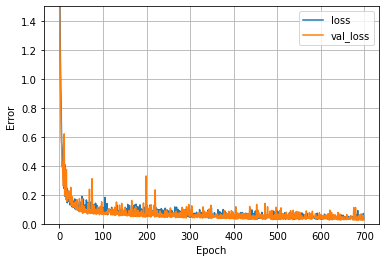

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
results = model0.evaluate(XX_test_n, yy_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model0.evaluate(XX_train_n, yy_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

19/19 [==============================] - 0s 2ms/step - loss: 0.0269 - mse: 0.0078
loss test data:  0.026856858283281326
mse test data:  0.007815430872142315
19/19 [==============================] - 0s 2ms/step - loss: 0.0284 - mse: 0.0094
loss train data:  0.028393322601914406
mse train data:  0.00935189239680767


<function matplotlib.pyplot.show>

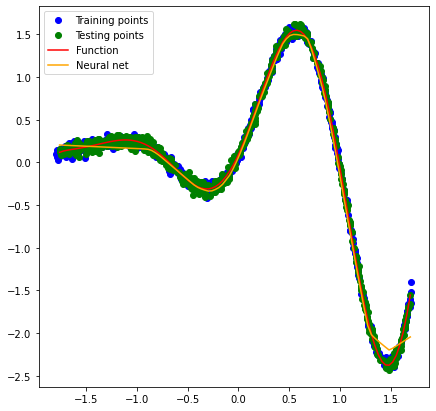

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n,yy_train_n, 'o', color='blue', label='Training points')
plt.plot(XX_test_n,yy_test_n, 'o', color='green', label='Testing points')

points = np.linspace(min(XX_test_n), max(XX_test_n),num=100)
plt.plot(points, (funct(points*stdX+meanX)-meanY)/stdY,  color='red', label='Function')

plt.plot(points, model0.predict(points),  color='orange', label='Neural net')

plt.legend()

plt.show

**The Boston Housing Price dataset**

We will be attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the suburb at the time, such as the crime rate, the local property tax rate, etc.

The dataset has very few data points, only 506 in total, split between 404 training samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a feature) has a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, others between 0 and 100...

In [ ]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step



**Preparing the data**

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

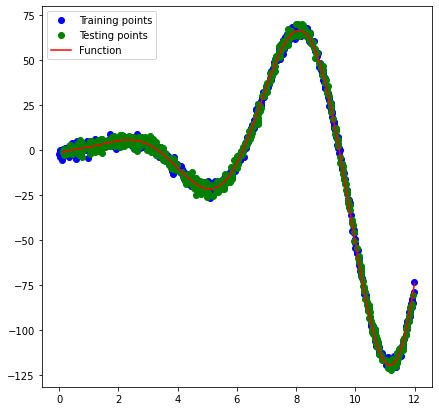

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train,yy_train, 'o', color='blue', label='Training points')
plt.plot(XX_test,yy_test, 'o', color='green', label='Testing points')

points = np.linspace(low, high,num=100)
plt.plot(points, funct(points),  color='red', label='Function')
plt.legend()


plt.show



Define, compile and train neural network

In [ ]:

model = Sequential()




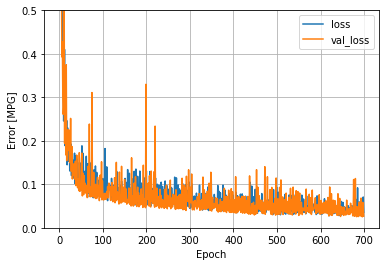

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)


Evaluate neural network

In [ ]:
results = model.evaluate(X_test_n, y_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model.evaluate(X_train_n, y_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])